In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**A. Importing, cleaning and numerical summaries**
1.	Download the data set data.csv from the Resources tab.
2.	Import the data as a pandas DataFrame.
3.	Check the number of observations.
4.	Obtain the column headings.
5.	Check the data type for each column.
6.	Check if there are any missing values.
7.	If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.
8.	Obtain the mean, minimum and maximum value for each column containing numerical data.
9.	List the 10 happiest countries.
10.	List the 10 least happy countries.


In [70]:
df=pd.read_csv('data.csv', header=0)
df.set_index('Country', inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, Malta to Russia
Data columns (total 11 columns):
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 14.3+ KB


In [72]:
df.shape
# number of rows & columns

(153, 11)

In [73]:
df.columns
#another way : df.head(1)

Index(['Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Generosity', 'Corruption', 'Dystopia', 'Job Satisfaction',
       'Region'],
      dtype='object')

In [74]:
df.dtypes

Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

In [75]:
df.isnull().sum()
#Pandas Series.isnull() function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False.
#.sum allow us to only have a numerical summary

Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

In [76]:
Missing_values = df[df.isnull().any(axis=1)]
#I create here an object to get where are those missing values

In [77]:
Missing_values.head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


In [78]:
df.dropna(inplace=True)
#Remove missing values
#If i wanted to put a 0 instead = df.fillna(0)

In [79]:
df.isnull().sum()
#We dont have any missing values anymore

Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64

In [80]:
df.dtypes
#after checkin df.dtypes again, I can esure that for each columns data are of the same type

Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

In [81]:
df.describe()
#I can obtain pretty quickly basic descriptive statistics via this command

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [82]:
df_hs_mean = df['Happiness Score'].mean()
#This would be a way in order to have an object containing this value (for eventual further analysis). We could do the same with min,max,etc. 

In [83]:
print ('Happiness Score Descriptiv statistics:')
print ('MEAN')
df_hs_mean = df['Happiness Score'].mean()
print(df_hs_mean)
print ('MIN')
df_hs_min=df['Happiness Score'].min()
print(df_hs_min)
print ('MAX')
df_hs_max=df['Happiness Score'].max()
print(df_hs_max)

Happiness Score Descriptiv statistics:
MEAN
5.357874172417219
MIN
2.6930000780000003
MAX
7.537000179


In [84]:
df.sort_values(by='Happiness Rank', ascending=True).head(10)
#another way to do it : df.nsmallest(10,'Happiness Rank')

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


In [85]:
df.sort_values(by='Happiness Rank', ascending=False).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific


**B. Indexing and grouping**
1.	Group the data points by region and save them into separate .csv files ex. a Western Europe.csv with all the data for countries in Western Europe and so on for the other 5 regions.
2.	Compute the mean happiness score for each region and rank the regions from most happy to least happy.
3.	Compute the number of countries in each region that have a happiness score above 6.0.
4.	Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?


In [86]:
df_Region = df.groupby('Region')
#create a new data frame by region (without modifying my original dataframe)

In [87]:
df_Region.describe()

Happiness Rank                                               \
                        count        mean        std    min     25%    50%   
Region                                                                       
Africa                   43.0  122.116279  24.636606   53.0  109.00  127.0   
Asia-Pacific             43.0   78.325581  39.261468    8.0   44.50   80.0   
Eastern Europe           21.0   70.619048  18.977556   40.0   56.00   67.0   
Europe                    1.0  132.000000        NaN  132.0  132.00  132.0   
Latin America            22.0   50.772727  31.263750   12.0   28.25   43.5   
North America             2.0   10.500000   4.949747    7.0    8.75   10.5   
Western Europe           19.0   20.000000  20.811322    1.0    5.50   16.0   

                              Happiness Score            ...  Dystopia  \
                   75%    max           count      mean  ...       75%   
Region                                                   ...             
Africa          139.50  155.0            43.0  4.254581  ...  2.040874   
Asia-Pacific    109.00  152.0            43.0  5.358326  ...  1.885810   
Eastern Europe   83.00  109.0            21.0  5.498952  ...  2.010541   
Europe          132.00  132.0             1.0  4.096000  ...  0.814382   
Latin America    68.25  145.0            22.0  5.957818  ...  2.627984   
North America    12.25   14.0             2.0  7.154500  ...  2.210401   
Western Europe   25.00   89.0            19.0  6.880474  ...  2.285915   

                         Job Satisfaction                                     \
                     max            count       mean        std   min    25%   
Region                                                                         
Africa          3.117485             43.0  61.193023  10.536770  44.4  54.00   
Asia-Pacific    2.801757             43.0  77.834884   9.347546  50.7  72.15   
Eastern Europe  2.807808             21.0  77.628571   6.272730  68.5  73.30   
Europe          0.814382              1.0  72.300000        NaN  72.3  72.30   
Latin America   2.898639             22.0  81.104545   8.363838  48.5  79.80   
North America   2.218113              2.0  87.900000   3.676955  85.3  86.60   
Western Europe  2.451862             19.0  90.310526   4.124035  79.8  87.75   

                                    
                  50%    75%   max  
Region                              
Africa          57.80  69.50  86.0  
Asia-Pacific    79.80  83.85  93.7  
Eastern Europe  77.10  82.10  88.7  
Europe          72.30  72.30  72.3  
Latin America   82.35  84.40  90.1  
North America   87.90  89.20  90.5  
Western Europe  91.20  93.60  95.1  

[7 rows x 80 columns]

In [88]:
# here it seems to be weird to only have one for europe => might be a mistake, so we need to know where !

In [89]:
df[df['Region']=='Europe'].head()
#I want to locate it
#Maybe find a way via iloc ?

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Ukraine,132,4.096,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.3,Europe


In [90]:
df = df.replace('Europe', 'Eastern Europe')
#In dataframe wanna change Eu by EE

In [91]:
df['Region'].unique() 
#to control that we effectively removed it :

array(['Western Europe', 'Africa', 'Eastern Europe', 'Asia-Pacific',
       'Latin America', 'North America'], dtype=object)

In [92]:
for i, g in df.groupby('Region'):
     g.to_csv('{}.csv'.format(i.split('/')[0]), index=True)
#create my csv ==> found this way on Github and seems to be pretty convenient !

In [93]:
df_Region['Happiness Score'].describe().sort_values(by="mean",ascending=False)
#Again use of it to have quick descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,2.0,7.154500,0.228395,6.993,7.07375,7.1545,7.23525,7.316
Western Europe,19.0,6.880474,0.611070,5.195,6.56800,6.9510,7.42300,7.537
Latin America,22.0,5.957818,0.750925,3.603,5.54850,6.0395,6.45400,7.079
Eastern Europe,21.0,5.498952,0.402033,4.644,5.23700,5.5690,5.83800,6.098
Asia-Pacific,43.0,5.358326,0.955062,3.462,4.65000,5.2690,6.02750,7.314
Africa,43.0,4.254581,0.682470,2.693,3.80150,4.1900,4.63450,5.872
Europe,1.0,4.096000,NaN,4.096,4.09600,4.0960,4.09600,4.096


In [94]:
df_North = df[df['Region'] == 'North America']
df_Western = df[df['Region'] == 'Western Europe']
df_Latin = df[df['Region'] == 'Latin America']
df_Eastern = df[df['Region'] == 'Eastern Europe']
df_Asia = df[df['Region'] == 'Asia-Pacific']
df_Africa = df[df['Region'] == 'Africa']
#create dataframes for each region without modifying the original one

In [95]:
# a way to do one by one : len(df_Africa[df_Africa['Happiness Score'] > 6])
# Here under I pass it within one cell
# the len() function returns an integer which is the length of the string : here the number of items in an object

In [96]:
print ('Number of countries being "happy" per region (score above 6):')
print ('in North America:')
df_North_hs = len(df_North[df_North['Happiness Score'] > 6])
print(df_North_hs)
print ('in Western Europe:')
df_Western_hs = len(df_Western[df_Western['Happiness Score'] > 6])
print(df_Western_hs)
print ('in Latin America:')
df_Latin_hs = len(df_Latin[df_Latin['Happiness Score'] > 6])
print(df_Latin_hs)                                               
print ('in Eastern Europe:')
df_Eastern_hs = len(df_Eastern[df_Eastern['Happiness Score'] > 6])
print(df_Eastern_hs) 
print ('in Asia:')
df_Asia_hs = len(df_Asia[df_Asia['Happiness Score'] > 6])
print(df_Asia_hs)      
print ('in Africa:')
df_Africa_hs = len(df_Africa[df_Africa['Happiness Score'] > 6])
print(df_Africa_hs) 

Number of countries being "happy" per region (score above 6):
in North America:
2
in Western Europe:
17
in Latin America:
13
in Eastern Europe:
1
in Asia:
11
in Africa:
0


In [97]:
print ('The difference between the maximum and minimum happiness score for each region is :')
print ('in North America:')
Diff_N = df_North.max(axis=0)['Happiness Score'] - df_North.min(axis=0)['Happiness Score']
print(Diff_N)
print ('in Western Europe:')
Diff_W = df_Western.max(axis=0)['Happiness Score'] - df_Western.min(axis=0)['Happiness Score']
print(Diff_W)
print ('in Latin America:')
Diff_L = df_Latin.max(axis=0)['Happiness Score'] - df_Latin.min(axis=0)['Happiness Score']
print(Diff_L)
print ('in East. Europe:')
Diff_E = df_Eastern.max(axis=0)['Happiness Score'] - df_Eastern.min(axis=0)['Happiness Score']
print(Diff_E)
print ('in Asia-Pacific:')
Diff_As = df_Asia.max(axis=0)['Happiness Score'] - df_Asia.min(axis=0)['Happiness Score']
print(Diff_As)
print ('in Africa:')
Diff_A = df_Africa.max(axis=0)['Happiness Score'] - df_Africa.min(axis=0)['Happiness Score']
print(Diff_A)

The difference between the maximum and minimum happiness score for each region is :
in North America:
0.32299995400000014
in Western Europe:
2.3420000069999993
in Latin America:
3.4760000700000004
in East. Europe:
2.0019998549999993
in Asia-Pacific:
3.852000237
in Africa:
3.179000139


In [98]:
print('The largest range is :')

max(Diff_N,Diff_W,Diff_L,Diff_E, Diff_As, Diff_A)

The largest range is :


3.852000237

In [99]:
Difference = {}
Difference['North America'] = Diff_N
Difference['Western Europe'] = Diff_W
Difference['Latin America'] = Diff_L
Difference['Eastern Europe'] = Diff_E
Difference['Asia Pacific'] = Diff_As
Difference["Africa"] = Diff_A

In [100]:
print ('The region with the largest range of happiness scores among its countries is: ')
max(Difference, key=Difference.get)
#To write the same results but with words

The region with the largest range of happiness scores among its countries is: 


'Asia Pacific'

**C. Bar plot of the Happiness Score**
1.	Obtain a horizontal bar plot of the Happiness Score of the top 10 countries. Your bar chart should have the names of the countries are listed vertically along the y-axis and the x-axis should have labels for each number from 0 to 8
2.	Ensure that the chart has an appropriate title and labels.
3.	You will now modify the bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:
o	Economy
o	Family
o	Health
o	Freedom
o	Generosity
o	Corruption
o	Dystopia
Choose a distinct color for each category and include an appropriate legend with your chart.
4.	Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa.


In [101]:
df_plot = df.sort_values(by='Happiness Rank', ascending=True).head(10)
#I create a news data frame for our plotting purposes

In [102]:
df_plot.head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


Text(0.5, 1.0, 'The 10 happiest countries')

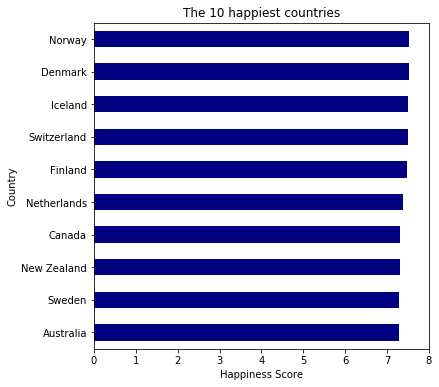

In [103]:
df_plot['Happiness Score'].plot(xticks=np.arange(9),
                                kind='barh',
                                figsize= (6,6),
                                color='navy').invert_yaxis()
plt.xlabel("Happiness Score")
plt.title('The 10 happiest countries')
#I invert the y axis in order to have the first one at the top 

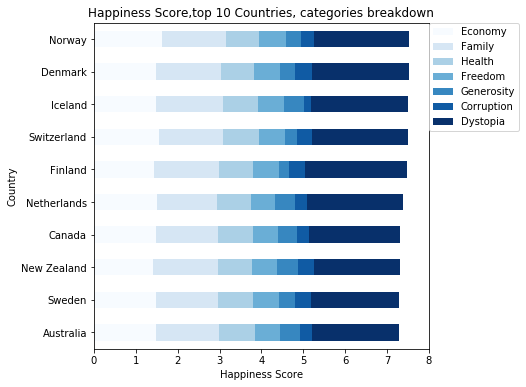

In [104]:
df_plot[['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']].head(10).plot(kind='barh',
                                                                                                         xticks=np.arange(9),
                                                                                                         stacked=True,
                                                                                                         figsize = (6,6),
                                                                                                         colormap='Blues').invert_yaxis()
plt.xlabel('Happiness Score')
plt.title('Happiness Score,top 10 Countries, categories breakdown')
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)

In [105]:
df_Africa = df_Africa.sort_values(by='Happiness Score', ascending=False).head(10)

In [106]:
df_Africa.head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Algeria,53,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,68.6,Africa
Mauritius,64,5.629,1.189396,1.209561,0.638007,0.491247,0.360934,0.042182,1.697584,86.0,Africa
Libya,68,5.525,1.101803,1.357564,0.520169,0.465733,0.152074,0.092610,1.835011,75.8,Africa
Morocco,84,5.235,0.878115,0.774864,0.597711,0.408158,0.032210,0.087763,2.456189,64.8,Africa
Somalia,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,79.9,Africa


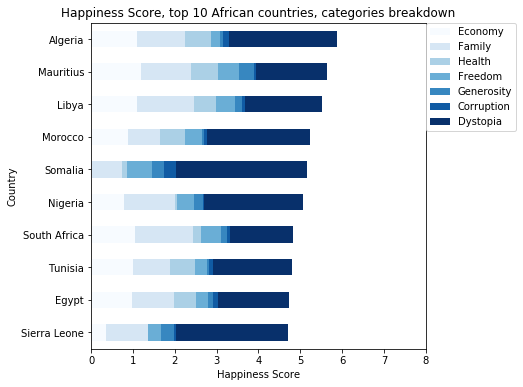

In [107]:
df_Africa[['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']].head(10).plot(kind='barh',
                                                                                                           xticks=np.arange(9),
                                                                                                           stacked=True,
                                                                                                           figsize = (6,6),
                                                                                                           colormap='Blues').invert_yaxis()
                                                                                                    
plt.xlabel("Happiness Score")
plt.title('Happiness Score, top 10 African countries, categories breakdown')
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)
#I decide here to let 8 as a maximum on the x coordinate in order to have an accurate visual comparison with the previous graph

**D. Histogram of Job Satisfaction**

1.	Obtain a histogram of the Job Satisfaction using the following categories:
•	40%-50%
•	50%-60%
•	60%-70%
•	70%-80%
•	80%-90%
•	90%-100%

Text(0.5, 1.0, 'Distribution of Job Satisfaction')

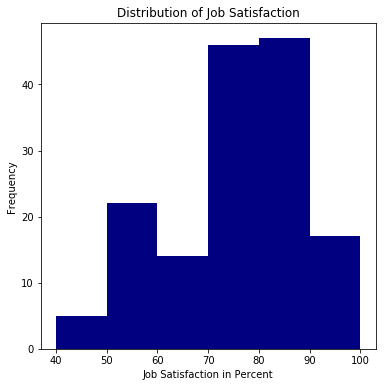

In [108]:
df['Job Satisfaction'].plot(kind='hist',
                            bins=[ 40, 50, 60, 70, 80, 90, 100],
                            figsize=(6,6),
                            color='navy')
plt.xlabel("Job Satisfaction in Percent")
plt.title("Distribution of Job Satisfaction")

**E. Pairwise Scatter plots**
1.	Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as supposed to separate commands for each plot.

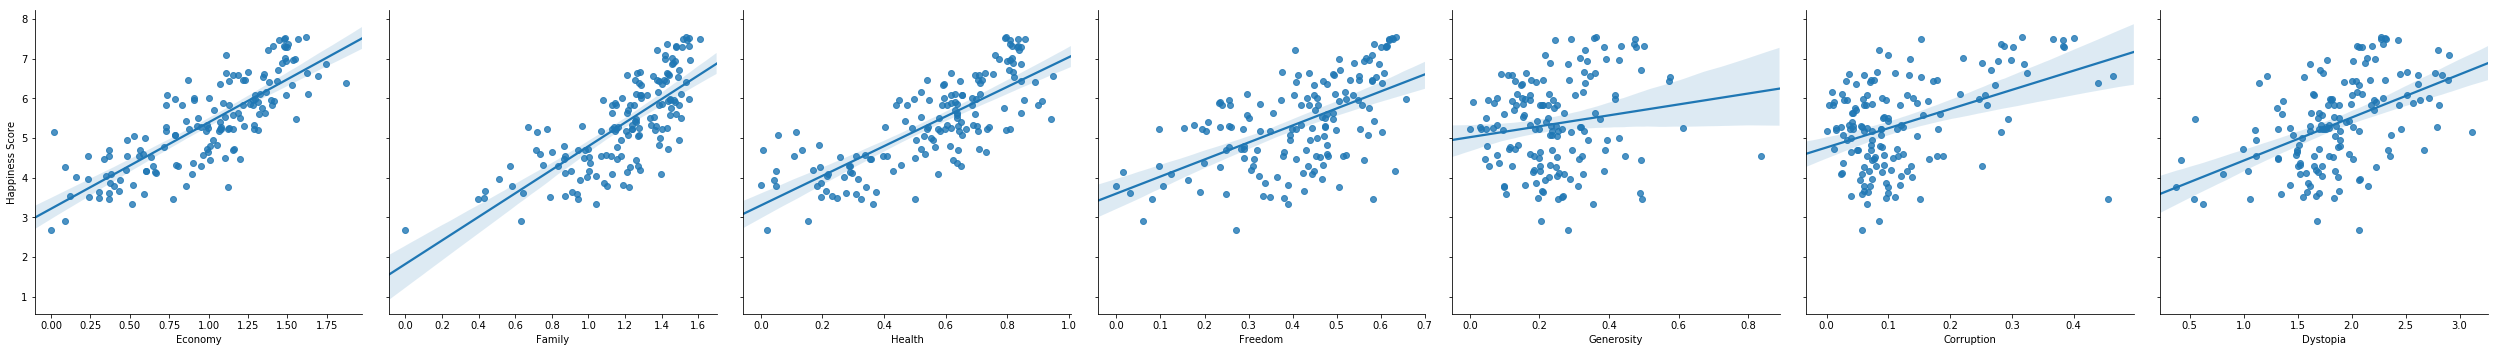

In [110]:
sns.pairplot(df, x_vars=['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia'],
             y_vars=['Happiness Score'],
             kind='reg',
             height=5)

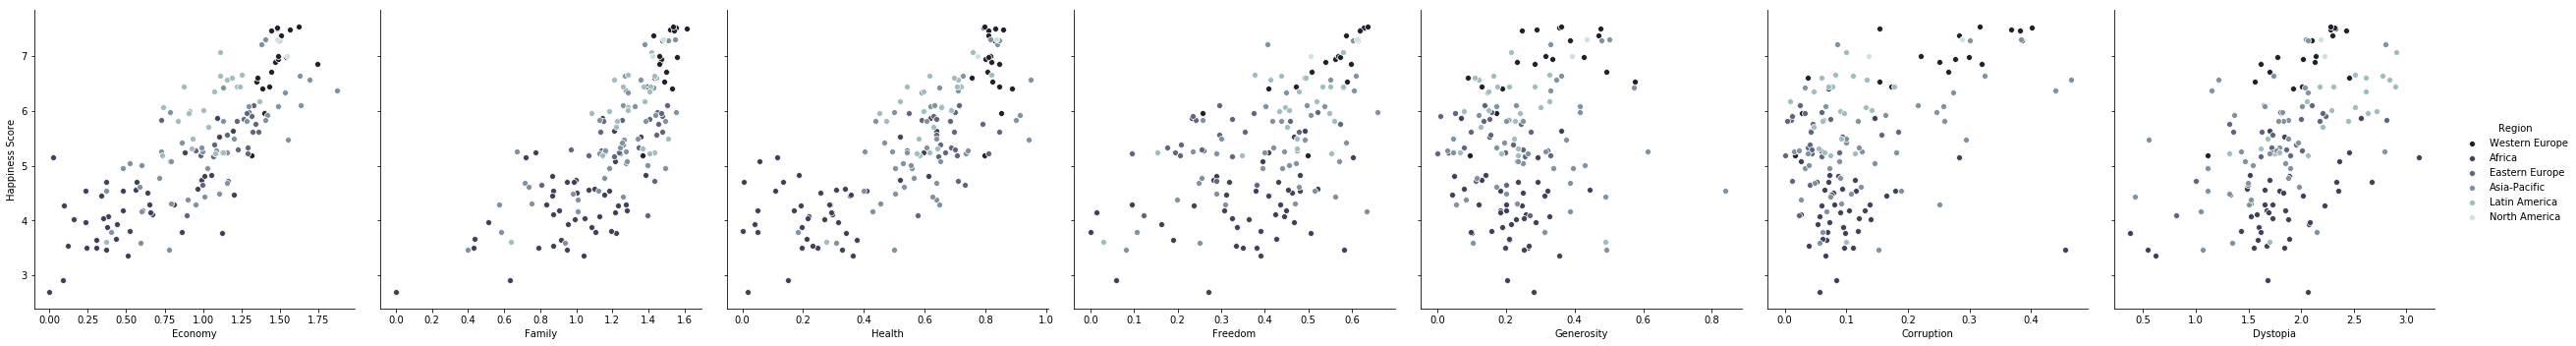

In [111]:
sns.pairplot(df, x_vars=['Economy', 'Family','Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia'],
             y_vars=['Happiness Score'],
             height=5,
             hue='Region',
             palette='bone')
#Just a test with the hue command

**F. Correlation**
1.	Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

In [112]:
df_corr = df.drop('Happiness Rank', axis=1)    
#makes no sens to keep 'Happiness Rank' for our present correlation analysis, so I decide to remove it and create a new df_corr

In [113]:
df_corr.corr(method='pearson',min_periods=30)
#Compute pairwise correlation of columns, excluding NA/null values.
#When to know to use spearman or pearson ?  df_corr.corr(method='spearman',min_periods=30)

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Happiness Score,1.000000,0.808678,0.749612,0.777731,0.567948,0.164123,0.438262,0.481117,0.812873
Economy,0.808678,1.000000,0.685524,0.838884,0.363843,-0.015614,0.358750,0.022620,0.700662
Family,0.749612,0.685524,1.000000,0.606674,0.412633,0.050771,0.236262,0.075480,0.623266
Health,0.777731,0.838884,0.606674,1.000000,0.340986,0.068895,0.286777,0.055886,0.704795
Freedom,0.567948,0.363843,0.412633,0.340986,1.000000,0.319387,0.501632,0.092923,0.500655
Generosity,0.164123,-0.015614,0.050771,0.068895,0.319387,1.000000,0.292363,-0.102683,0.220032
Corruption,0.438262,0.358750,0.236262,0.286777,0.501632,0.292363,1.000000,-0.014995,0.337131
Dystopia,0.481117,0.022620,0.075480,0.055886,0.092923,-0.102683,-0.014995,1.000000,0.281655
Job Satisfaction,0.812873,0.700662,0.623266,0.704795,0.500655,0.220032,0.337131,0.281655,1.000000


In [114]:
df_corr.corr(method="pearson")['Happiness Score'].sort_values(ascending=False)

Happiness Score     1.000000
Job Satisfaction    0.812873
Economy             0.808678
Health              0.777731
Family              0.749612
Freedom             0.567948
Dystopia            0.481117
Corruption          0.438262
Generosity          0.164123
Name: Happiness Score, dtype: float64

==> Job satisfaction & Economy seems to have the highest correlation with the Happiness Score

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

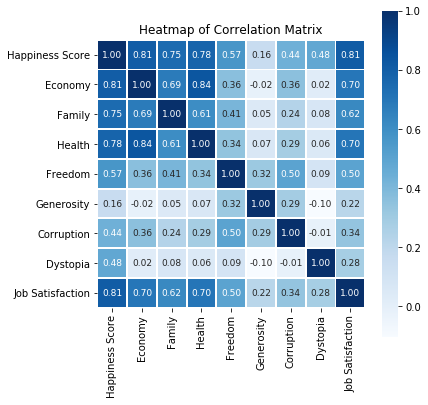

In [115]:
plt.figure(figsize=(6,6))
df_corr = df.drop(['Happiness Rank'],axis = 1).corr()
sns.heatmap(df_corr,
            cbar = True,
            square = True,
            annot=True,
            linewidths = .8,
            fmt='.2f',
            cmap='Blues',
            annot_kws={'size': 9}) 
plt.title('Heatmap of Correlation Matrix')

**G.Probabilities**
1.	Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.	

In [116]:
len(df[(df['Happiness Score'] > 6) & (df['Region'] == 'Western Europe')])
#len function allow us only to have the number of cases of the asked condition

17

In [117]:
len(df[df['Happiness Score'] > 6])

44

In [118]:
print ('The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is:')
len(df[(df['Happiness Score'] > 6) & (df['Region'] == 'Western Europe')])/(len(df[df['Happiness Score'] > 6]))*100

The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is:


38.63636363636363

**H. Matrices**

1.	Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [119]:
#I found this solution on Github. 
#I would like you, if possible, to comment the cell below to be sure that my understanding is correct. Thanks for your help !

In [120]:
North_America = []
Western_Europe = []
Latin_America = []
Eastern_Europe = []
Asia_Pacific = []
Africa = []

In [121]:
for x in df['Region']:
    if x == 'North America':
         North_America.append(1)
    else: North_America.append(0)
#I find the boolean way convenient here and comprehensive

In [122]:
for x in df['Region']:
    if x == 'Western Europe':
         Western_Europe.append(1)
    else: Western_Europe.append(0)


In [123]:
for x in df['Region']:
    if x == 'Latin America':
         Latin_America.append(1)
    else: Latin_America.append(0)

In [124]:
for x in df['Region']:
    if x == 'Eastern Europe':
         Eastern_Europe.append(1)
    else: Eastern_Europe.append(0)

In [125]:
for x in df['Region']:
    if x == 'Asia-Pacific':
         Asia_Pacific.append(1)
    else: Asia_Pacific.append(0)

In [126]:
for x in df['Region']:
    if x == 'Africa':
         Africa.append(1)
    else: Africa.append(0)

In [127]:
Matrix = pd.DataFrame(index=df.index)
#I set at the very beginning countries as index

In [128]:
Matrix['Western Europe'] = Western_Europe
Matrix['Eastern Europe'] = Eastern_Europe
Matrix['North America'] = North_America
Matrix['Latin America'] = Latin_America
Matrix['Asia Pacific'] = Asia_Pacific
Matrix['Africa'] = Africa
#Define the columns of the matrix

In [129]:
Matrix.head(10)

,Western Europe,Eastern Europe,North America,Latin America,Asia Pacific,Africa
Country,,,,,,
Malta,1,0,0,0,0,0
Zimbabwe,0,0,0,0,0,1
Cyprus,0,1,0,0,0,0
Iran,0,0,0,0,1,0
Mexico,0,0,0,1,0,0
New Zealand,0,0,0,0,1,0
Poland,0,1,0,0,0,0
Egypt,0,0,0,0,0,1
Senegal,0,0,0,0,0,1


In [132]:
array_Matrix = Matrix.as_matrix()
array_Matrix

/Users/leo/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
 